# Credit Card Fraud Detection

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

## Load dataset

In [2]:
df = pd.read_csv("/content/creditcard.csv")

## Exploratory Data Analysis (EDA)

### Display basic information

In [3]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Basic statistics
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

### Analyze Class Imbalance


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-6-682df87bd7d7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


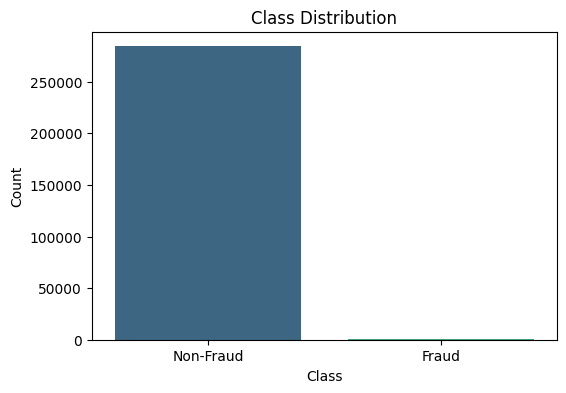

In [6]:
# Count distribution of fraud (Class 1) vs non-fraud (Class 0)
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

### Analyze Time Feature

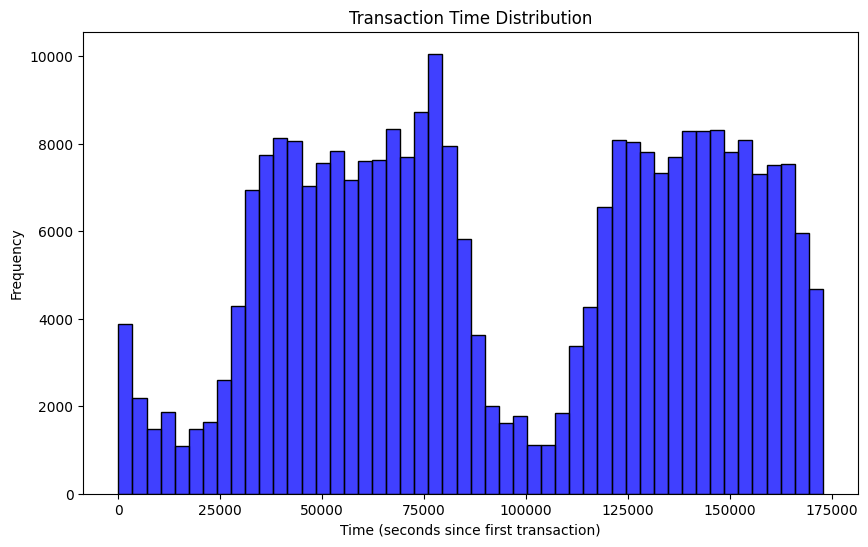

In [7]:
 # Plot transaction time distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=False, color='blue')
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()

### Analyze Transaction Amount

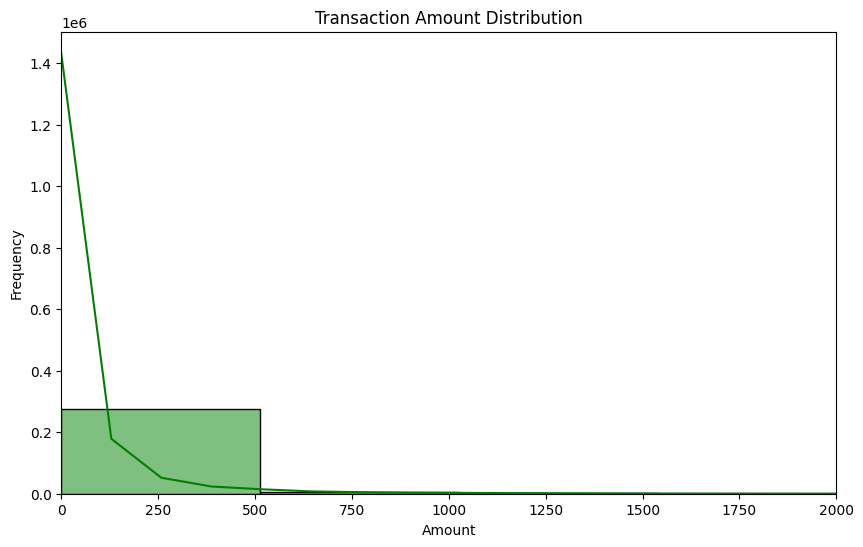

<ipython-input-8-08d69c0f9365>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette="muted")


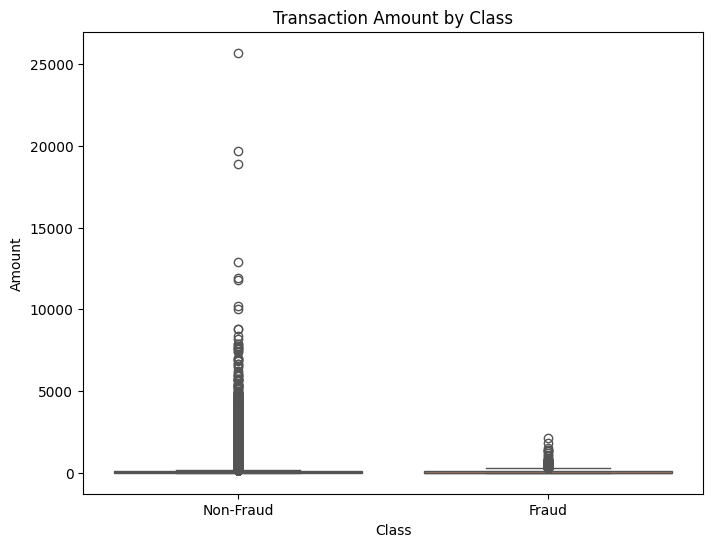

In [8]:
# Plot transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='green')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, 2000)  # Focus on realistic range
plt.show()

# Boxplot for Fraud vs Non-Fraud Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette="muted")
plt.title("Transaction Amount by Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


### Feature Distribution for Fraud vs Non-Fraud

<ipython-input-15-41955c56157f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Class'] == 0], label="Non-Fraud", shade=True, color="blue")
<ipython-input-15-41955c56157f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Class'] == 1], label="Fraud", shade=True, color="red")
<ipython-input-15-41955c56157f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Class'] == 0], label="Non-Fraud", shade=True, color="blue")
<ipython-input-15-41955c56157f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

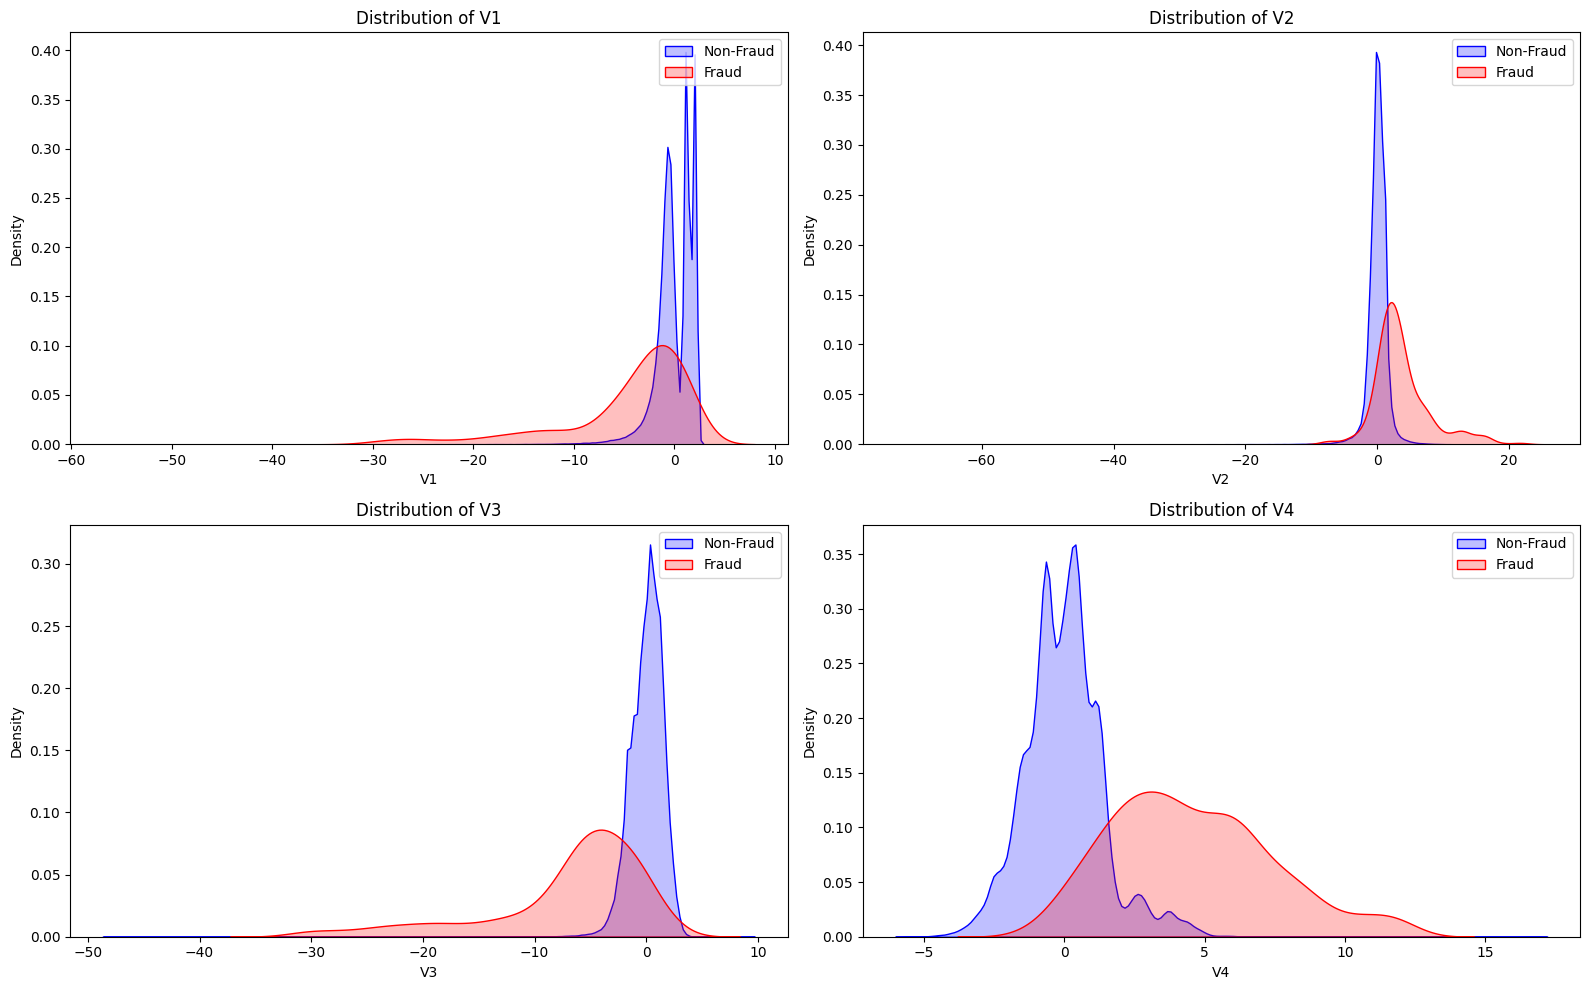

In [15]:
# Select random features for comparison
sample_features = ['V1', 'V2', 'V3', 'V4']

# Plot distributions for each feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(sample_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[feature][df['Class'] == 0], label="Non-Fraud", shade=True, color="blue")
    sns.kdeplot(df[feature][df['Class'] == 1], label="Fraud", shade=True, color="red")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

## Data Processing

### Split data into features and labels

In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

### Split data (stratified)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Scale data

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Apply SMOTE for balancing

In [12]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Modeling

### Random Forest

In [13]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)

### XGBoost

In [14]:
xgb_model = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) /
                                           len(y_train_resampled[y_train_resampled == 1]),
                          random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test)

### SVM

In [ ]:
svm_model = SVC(class_weight="balanced", probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_preds = svm_model.predict(X_test)

## Evaluate Models

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}\n")

# Evaluate Random Forest
evaluate_model(y_test, rf_preds, "Random Forest")

# Evaluate XGBoost
evaluate_model(y_test, xgb_preds, "XGBoost")

# Evaluate SVM
#evaluate_model(y_test, svm_preds, "SVM")

Evaluation for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9132

Evaluation for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9232



## Exploring Alternative Imbalance Methods
- In-Algorithm Techniques:
 - For Random Forest and XGBoost, use class_weight or scale_pos_weight.
 - For SVM, tune the class_weight parameter.
- Under-Sampling: Use techniques like NearMiss or random under-sampling for balancing.
- Anomaly Detection: Consider one-class SVM or isolation forests.

### In-Algorithm Techniques

In [16]:
# Random Forest with class_weight
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)  # Original data (no SMOTE applied here)
rf_preds = rf_model.predict(X_test)

# Evaluation
evaluate_model(y_test, rf_preds, "Random Forest (In-Algorithm)")

Evaluation for Random Forest (In-Algorithm)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8724



In [17]:
# XGBoost: scale_pos_weight
# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# XGBoost with scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation
evaluate_model(y_test, xgb_preds, "XGBoost (In-Algorithm)")

Evaluation for XGBoost (In-Algorithm)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9183



In [ ]:
# SVM with class_weight
# svm_model = SVC(class_weight="balanced", probability=True, random_state=42)
# svm_model.fit(X_train, y_train)
# svm_preds = svm_model.predict(X_test)

# Evaluation
#evaluate_model(y_test, svm_preds, "SVM (In-Algorithm)")

### Under-Sampling

In [18]:
# Apply NearMiss under-sampling
nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# Train Random Forest on under-sampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)

# Evaluation
evaluate_model(y_test, rf_preds, "Random Forest (Under-Sampling with NearMiss)")

Evaluation for Random Forest (Under-Sampling with NearMiss)
              precision    recall  f1-score   support

           0       1.00      0.04      0.07     56864
           1       0.00      0.99      0.00        98

    accuracy                           0.04     56962
   macro avg       0.50      0.51      0.04     56962
weighted avg       1.00      0.04      0.07     56962

ROC-AUC: 0.5125



In [19]:
# Apply random under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train Random Forest on under-sampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)

# Evaluation
evaluate_model(y_test, rf_preds, "Random Forest (Random Under-Sampling)")

Evaluation for Random Forest (Random Under-Sampling)
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

ROC-AUC: 0.9413



### Anomaly Detection

In [ ]:
# Train One-Class SVM on non-fraudulent data only (Class == 0)
non_fraud = X_train[y_train == 0]
ocsvm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)  # Tune gamma and nu
ocsvm.fit(non_fraud)

# Predict on the test set
y_pred = ocsvm.predict(X_test)
y_pred = [0 if x == 1 else 1 for x in y_pred]  # Map OneClassSVM output to 0/1

# Evaluation
evaluate_model(y_test, y_pred, "One-Class SVM (Anomaly Detection)")

In [20]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination rate
iso_forest.fit(X_train)

# Predict on test set
y_pred = iso_forest.predict(X_test)
y_pred = [0 if x == 1 else 1 for x in y_pred]  # Map IsolationForest output to 0/1

# Evaluation
evaluate_model(y_test, y_pred, "Isolation Forest (Anomaly Detection)")

Evaluation for Isolation Forest (Anomaly Detection)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.66      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.83      0.59     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC: 0.8268

